In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Adam
from torch import nn

In [2]:
data = pd.read_excel("/kaggle/input/climate-data-for-the-max-temperatures/data.xlsx")
data.head()

,YEAR,MONTH,Kitgum,Kasese,Gulu,Arua,Masindi,Soroti,Tororo,Jinja,Mbarara,Entebbe,Kabale,Kampala,Kotido,Mubende,Kibanda,Buginyanya,Kyembogo,Wadelai
0,2012,1,34.233,31.633,33.200,31.933,32.733,33.267,32.867,31.333,29.300,28.067,26.167,30.333,33.967,28.533,31.133,32.567,27.167,35.233
1,2012,2,35.300,32.933,34.567,32.967,33.700,34.000,33.867,31.367,29.267,26.633,26.233,30.133,34.000,31.000,30.033,32.333,30.100,36.800
2,2012,3,34.833,32.833,34.500,32.800,33.833,34.100,33.267,29.467,29.100,25.367,26.000,28.833,33.233,30.067,29.333,31.500,30.400,36.400
3,2012,4,30.333,29.800,30.433,29.233,29.500,29.467,29.233,27.267,26.800,24.600,23.333,27.300,29.667,25.933,27.800,27.167,25.800,32.167
4,2012,5,28.900,28.867,29.067,28.133,29.300,28.800,28.800,27.533,26.367,24.233,22.767,27.200,27.933,25.833,27.267,25.933,25.967,31.767


In [3]:
data['date'] = data['YEAR'].astype("str") + '-' + data['MONTH'].astype("str")
data.head()

,YEAR,MONTH,Kitgum,Kasese,Gulu,Arua,Masindi,Soroti,Tororo,Jinja,...,Entebbe,Kabale,Kampala,Kotido,Mubende,Kibanda,Buginyanya,Kyembogo,Wadelai,date
0,2012,1,34.233,31.633,33.200,31.933,32.733,33.267,32.867,31.333,...,28.067,26.167,30.333,33.967,28.533,31.133,32.567,27.167,35.233,2012-1
1,2012,2,35.300,32.933,34.567,32.967,33.700,34.000,33.867,31.367,...,26.633,26.233,30.133,34.000,31.000,30.033,32.333,30.100,36.800,2012-2
2,2012,3,34.833,32.833,34.500,32.800,33.833,34.100,33.267,29.467,...,25.367,26.000,28.833,33.233,30.067,29.333,31.500,30.400,36.400,2012-3
3,2012,4,30.333,29.800,30.433,29.233,29.500,29.467,29.233,27.267,...,24.600,23.333,27.300,29.667,25.933,27.800,27.167,25.800,32.167,2012-4
4,2012,5,28.900,28.867,29.067,28.133,29.300,28.800,28.800,27.533,...,24.233,22.767,27.200,27.933,25.833,27.267,25.933,25.967,31.767,2012-5


In [4]:
data['date'] = pd.to_datetime(data['date'])
data.head()

,YEAR,MONTH,Kitgum,Kasese,Gulu,Arua,Masindi,Soroti,Tororo,Jinja,...,Entebbe,Kabale,Kampala,Kotido,Mubende,Kibanda,Buginyanya,Kyembogo,Wadelai,date
0,2012,1,34.233,31.633,33.200,31.933,32.733,33.267,32.867,31.333,...,28.067,26.167,30.333,33.967,28.533,31.133,32.567,27.167,35.233,2012-01-01
1,2012,2,35.300,32.933,34.567,32.967,33.700,34.000,33.867,31.367,...,26.633,26.233,30.133,34.000,31.000,30.033,32.333,30.100,36.800,2012-02-01
2,2012,3,34.833,32.833,34.500,32.800,33.833,34.100,33.267,29.467,...,25.367,26.000,28.833,33.233,30.067,29.333,31.500,30.400,36.400,2012-03-01
3,2012,4,30.333,29.800,30.433,29.233,29.500,29.467,29.233,27.267,...,24.600,23.333,27.300,29.667,25.933,27.800,27.167,25.800,32.167,2012-04-01
4,2012,5,28.900,28.867,29.067,28.133,29.300,28.800,28.800,27.533,...,24.233,22.767,27.200,27.933,25.833,27.267,25.933,25.967,31.767,2012-05-01


In [5]:
new_df = data.set_index('date')
new_df

,YEAR,MONTH,Kitgum,Kasese,Gulu,Arua,Masindi,Soroti,Tororo,Jinja,Mbarara,Entebbe,Kabale,Kampala,Kotido,Mubende,Kibanda,Buginyanya,Kyembogo,Wadelai
date,,,,,,,,,,,,,,,,,,,,
2012-01-01,2012,1,34.233,31.633,33.200,31.933,32.733,33.267,32.867,31.333,29.300,28.067,26.167,30.333,33.967,28.533,31.133,32.567,27.167,35.233
2012-02-01,2012,2,35.300,32.933,34.567,32.967,33.700,34.000,33.867,31.367,29.267,26.633,26.233,30.133,34.000,31.000,30.033,32.333,30.100,36.800
2012-03-01,2012,3,34.833,32.833,34.500,32.800,33.833,34.100,33.267,29.467,29.100,25.367,26.000,28.833,33.233,30.067,29.333,31.500,30.400,36.400
2012-04-01,2012,4,30.333,29.800,30.433,29.233,29.500,29.467,29.233,27.267,26.800,24.600,23.333,27.300,29.667,25.933,27.800,27.167,25.800,32.167
2012-05-01,2012,5,28.900,28.867,29.067,28.133,29.300,28.800,28.800,27.533,26.367,24.233,22.767,27.200,27.933,25.833,27.267,25.933,25.967,31.767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,2018,2,34.800,33.300,34.500,31.933,33.367,34.567,34.567,31.267,29.433,27.100,25.433,30.767,33.500,30.100,29.867,32.133,29.867,35.967
2018-03-01,2018,3,30.300,29.567,29.767,28.500,29.000,29.300,29.300,26.900,26.967,24.667,24.133,27.333,29.300,25.267,26.967,27.167,25.233,32.100
2018-04-01,2018,4,28.700,28.933,28.900,27.433,28.100,28.433,28.433,26.267,26.433,24.600,23.467,26.600,27.567,25.167,26.867,26.167,25.033,30.000


In [6]:
def plot_series_data(series_df : pd.DataFrame, district_name : str):
    plt.plot(series_df , marker='o' )

    plt.title(f'{district_name} Temperature Over Time')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.grid(True)

    # Displaying the dates on the x-axis
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [7]:
def create_dataset(data : pd.DataFrame, district : str, lookback = 7):
    df = data.copy()
    
    for i in range(lookback):
        df[f'temp_shift_{i}'] = df[district].shift(i)
    
    df.dropna(inplace=True)
    
    return df

In [8]:
class RNNDataset(Dataset):
    def __init__(self, X, y):
        super().__init__()
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, i):
        return self.X[i], self.y[i]

In [9]:
batch = 5
lookback = 7

In [10]:
def create_series_dataloader_on_district(district : str):
    series_df = new_df[[district]].astype('float32')
    plot_series_data(series_df, district)
    Xtrain = series_df[:60]
    Xtest = series_df[60:]
    
    Train_df = create_dataset(Xtrain, district)
    Test_df = create_dataset(Xtest, district)
    
    scaler = StandardScaler().fit(Train_df.to_numpy())

    Train_scaled = scaler.transform(Train_df.to_numpy())
    Test_scaled = scaler.transform(Test_df.to_numpy())
    
    Xtrain = Train_scaled[:, 1:]
    ytrain = Train_scaled[:, 0]

    Xtest = Test_scaled[:, 1:]
    ytest = Test_scaled[:, 0]
    
    Xtrain = Xtrain.reshape((-1, lookback, 1))
    Xtest = Xtest.reshape((-1, lookback, 1))

    ytrain = ytrain.reshape((-1, 1))
    ytest = ytest.reshape((-1, 1))
    
    Train_dataset = RNNDataset(torch.from_numpy(Xtrain), torch.from_numpy(ytrain))
    Test_dataset = RNNDataset(torch.from_numpy(Xtest), torch.from_numpy(ytest))
    
    Train_dataloader = DataLoader(Train_dataset, batch, shuffle = True)
    Test_dataloader = DataLoader(Test_dataset, batch)
    
    data_dict = {
        "Xtrain" : Xtrain,
        "Xtest" : Xtest,
        "ytrain" : ytrain,
        "ytest" : ytest
    }
    
    return Train_dataloader, Test_dataloader, data_dict

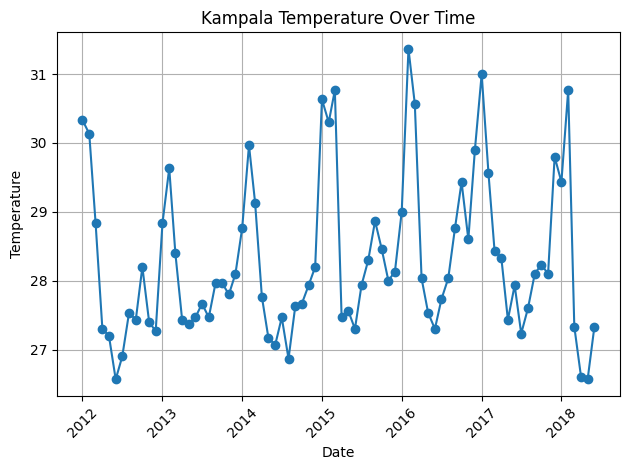

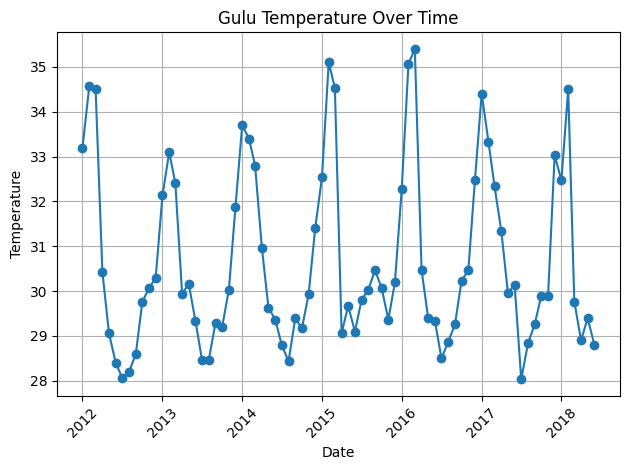

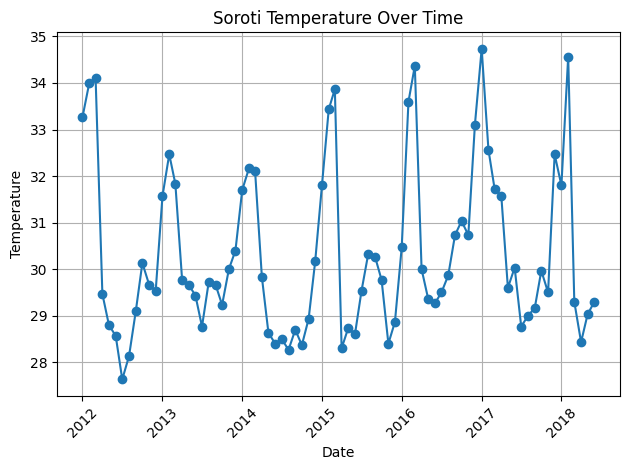

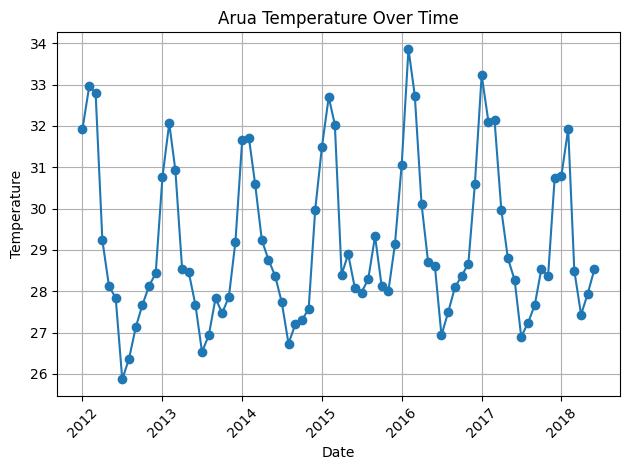

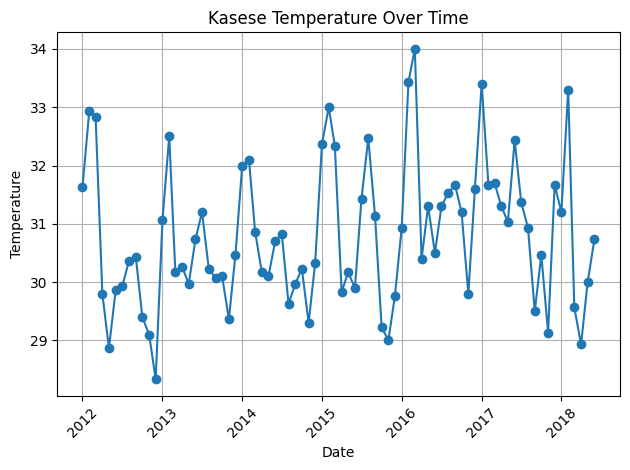

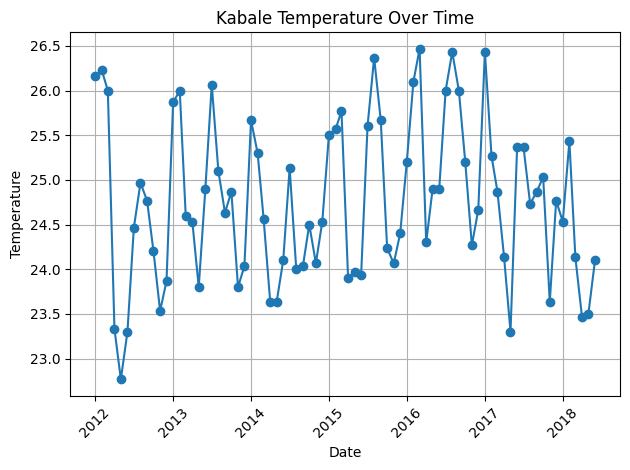

In [11]:
kampala_train_dataloader, kampale_test_dataloader, kampala_dict = create_series_dataloader_on_district('Kampala')
gulu_train_dataloader, gulu_test_dataloader, gulu_dict = create_series_dataloader_on_district('Gulu')
soroti_train_dataloader, soroti_test_dataloader, soroti_dict = create_series_dataloader_on_district('Soroti')
arua_train_dataloader, arua_test_dataloader, arua_dict = create_series_dataloader_on_district('Arua')
kasese_train_dataloader, kasese_test_dataloader, kasese_dict = create_series_dataloader_on_district('Kasese')
kabale_train_dataloader, kabale_test_dataloader, kabale_dict = create_series_dataloader_on_district('Kabale')

In [12]:
class ModelLSTM(nn.Module):
    def __init__(self, num_ouput = 1, hidden_size = 128, num_layers = 1):
        super().__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        
        self.lstm = nn.LSTM(input_size=1, hidden_size=self.hidden_size, num_layers=num_layers, batch_first = True)
        self.linear = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size)
        
        x, _ = self.lstm(x, (h0, c0))
        x = self.linear(x)
        return x[:, -1, :]

In [13]:
# test
for _, batch in enumerate(kabale_train_dataloader):
    train_batch, y_batch = batch[0], batch[1]
    print(train_batch.shape)
    print(y_batch.shape)
    break

torch.Size([5, 7, 1])
torch.Size([5, 1])


In [14]:
epochs = 100

In [15]:
def train_and_plot(train_dataloader, test_dataloader, data_dict, district):
    lstm_model = ModelLSTM()
    loss_fn = nn.MSELoss()
    optimizer = Adam(lstm_model.parameters())
    
    torch.manual_seed(1234)

    train_losses = []
    test_losses = []
    
    print(f"*************Model For District {district}")

    for epoch in range(epochs):
        lstm_model.train()
        train_loss = 0
        test_loss = 0

        for index, batch in enumerate(train_dataloader):
            X_batch, y_batch = batch[0], batch[1]
            y_pred = lstm_model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        if epoch % 10 != 0:
            continue
            
        lstm_model.eval()
        with torch.inference_mode():
            for index, batch in enumerate(test_dataloader):
                X_batch, y_batch = batch[0], batch[1]
                y_pred_test = lstm_model(X_batch)
                loss = loss_fn(y_pred_test, y_batch)
                test_loss += loss.item()

            train_rmse = np.sqrt(train_loss)
            test_rmse = np.sqrt(test_loss)

            train_losses.append(train_loss)
            test_losses.append(test_loss)

        print("Epoch %d: train MSE %.4f, test MSE %.4f, train RMSE %.4f, test RMSE %.4f" % (epoch, train_loss, test_loss, train_rmse, test_rmse))
        
    #Plot
    lstm_model.eval()
    plot_pred_actual(lstm_model, district + ", Train", data_dict['Xtrain'], data_dict['ytrain'])
    plot_pred_actual(lstm_model, district + ", Test", data_dict['Xtest'], data_dict['ytest'])

In [16]:
def plot_pred_actual(lstm_model, district, X, y):
    with torch.inference_mode():
        predictions = lstm_model(torch.from_numpy(X)).numpy()

    plt.title(f"Model Predictions and Actual for Model on District {district}")
    plt.plot(y, label='Actual pred')
    plt.plot(predictions, label = "Predicted")
    plt.legend()
    plt.show()

*************Model For District Kampala
Epoch 0: train MSE 11.2617, test MSE 4.5672, train RMSE 3.3559, test RMSE 2.1371
Epoch 10: train MSE 14.4108, test MSE 3.7091, train RMSE 3.7962, test RMSE 1.9259
Epoch 20: train MSE 10.3626, test MSE 4.9926, train RMSE 3.2191, test RMSE 2.2344
Epoch 30: train MSE 7.9186, test MSE 2.3160, train RMSE 2.8140, test RMSE 1.5218
Epoch 40: train MSE 7.2358, test MSE 3.6586, train RMSE 2.6899, test RMSE 1.9127
Epoch 50: train MSE 3.5406, test MSE 1.1605, train RMSE 1.8816, test RMSE 1.0773
Epoch 60: train MSE 1.6605, test MSE 0.5395, train RMSE 1.2886, test RMSE 0.7345
Epoch 70: train MSE 3.0356, test MSE 1.3460, train RMSE 1.7423, test RMSE 1.1602
Epoch 80: train MSE 2.2117, test MSE 1.0217, train RMSE 1.4872, test RMSE 1.0108
Epoch 90: train MSE 1.9564, test MSE 0.6369, train RMSE 1.3987, test RMSE 0.7981


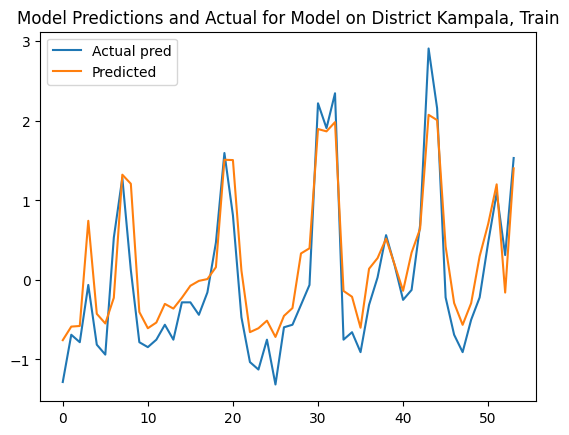

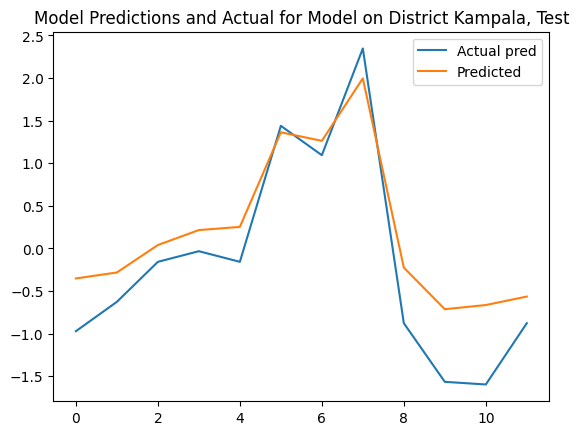

In [17]:
train_and_plot(kampala_train_dataloader, kampale_test_dataloader, kampala_dict, "Kampala")

*************Model For District Gulu
Epoch 0: train MSE 10.5805, test MSE 2.6333, train RMSE 3.2528, test RMSE 1.6227
Epoch 10: train MSE 10.7891, test MSE 2.8498, train RMSE 3.2847, test RMSE 1.6881
Epoch 20: train MSE 3.4183, test MSE 1.5895, train RMSE 1.8489, test RMSE 1.2608
Epoch 30: train MSE 2.5147, test MSE 0.6959, train RMSE 1.5858, test RMSE 0.8342
Epoch 40: train MSE 4.4916, test MSE 0.6092, train RMSE 2.1193, test RMSE 0.7805
Epoch 50: train MSE 13.3884, test MSE 2.3806, train RMSE 3.6590, test RMSE 1.5429
Epoch 60: train MSE 8.2358, test MSE 2.1717, train RMSE 2.8698, test RMSE 1.4737
Epoch 70: train MSE 4.7581, test MSE 0.6934, train RMSE 2.1813, test RMSE 0.8327
Epoch 80: train MSE 2.2882, test MSE 0.6205, train RMSE 1.5127, test RMSE 0.7877
Epoch 90: train MSE 2.4579, test MSE 0.3084, train RMSE 1.5678, test RMSE 0.5553


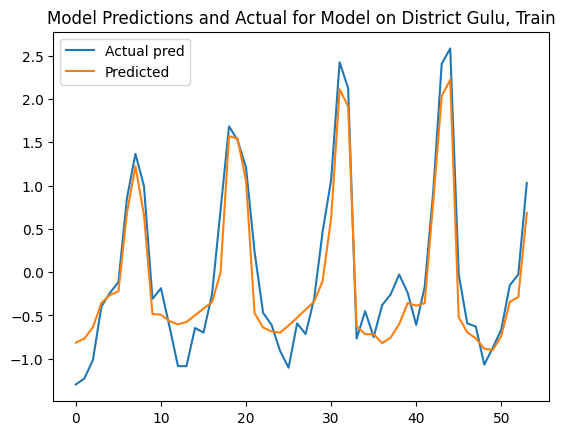

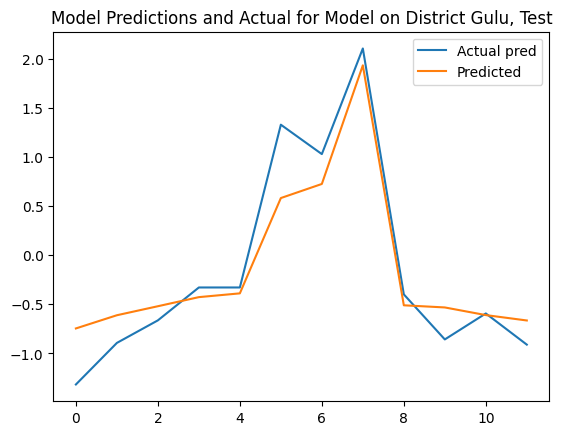

In [18]:
train_and_plot(gulu_train_dataloader, gulu_test_dataloader, gulu_dict, "Gulu")

*************Model For District Soroti
Epoch 0: train MSE 10.7046, test MSE 2.9921, train RMSE 3.2718, test RMSE 1.7298
Epoch 10: train MSE 10.8507, test MSE 3.1895, train RMSE 3.2940, test RMSE 1.7859
Epoch 20: train MSE 11.6145, test MSE 2.4291, train RMSE 3.4080, test RMSE 1.5586
Epoch 30: train MSE 10.7712, test MSE 2.7840, train RMSE 3.2820, test RMSE 1.6685
Epoch 40: train MSE 8.6089, test MSE 2.4157, train RMSE 2.9341, test RMSE 1.5543
Epoch 50: train MSE 5.5413, test MSE 1.5645, train RMSE 2.3540, test RMSE 1.2508
Epoch 60: train MSE 5.5663, test MSE 1.6248, train RMSE 2.3593, test RMSE 1.2747
Epoch 70: train MSE 6.4861, test MSE 1.0054, train RMSE 2.5468, test RMSE 1.0027
Epoch 80: train MSE 7.0254, test MSE 1.7938, train RMSE 2.6505, test RMSE 1.3393
Epoch 90: train MSE 4.0150, test MSE 0.6099, train RMSE 2.0037, test RMSE 0.7809


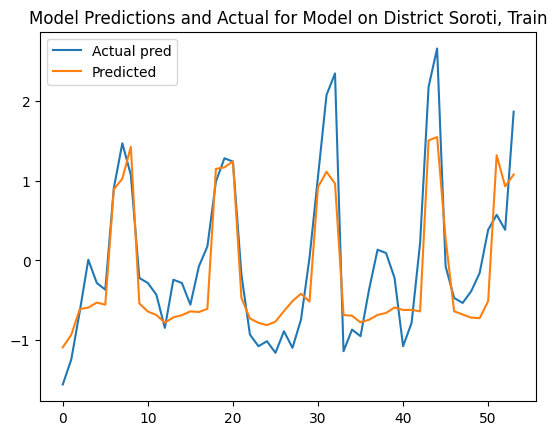

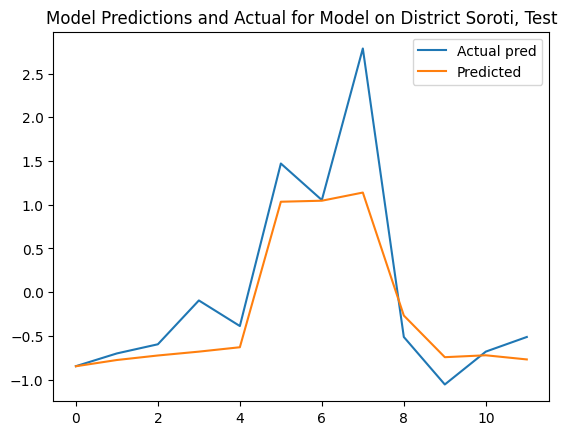

In [19]:
train_and_plot(soroti_train_dataloader, soroti_test_dataloader, soroti_dict, "Soroti")

*************Model For District Arua
Epoch 0: train MSE 10.5537, test MSE 1.6567, train RMSE 3.2486, test RMSE 1.2871
Epoch 10: train MSE 9.9793, test MSE 1.6379, train RMSE 3.1590, test RMSE 1.2798
Epoch 20: train MSE 9.8826, test MSE 1.5141, train RMSE 3.1437, test RMSE 1.2305
Epoch 30: train MSE 7.6777, test MSE 1.2169, train RMSE 2.7709, test RMSE 1.1031
Epoch 40: train MSE 4.0241, test MSE 0.5070, train RMSE 2.0060, test RMSE 0.7120
Epoch 50: train MSE 3.4152, test MSE 0.8352, train RMSE 1.8480, test RMSE 0.9139
Epoch 60: train MSE 3.0950, test MSE 0.3955, train RMSE 1.7593, test RMSE 0.6289
Epoch 70: train MSE 3.0921, test MSE 0.6143, train RMSE 1.7584, test RMSE 0.7838
Epoch 80: train MSE 3.7896, test MSE 0.8876, train RMSE 1.9467, test RMSE 0.9421
Epoch 90: train MSE 3.7213, test MSE 0.7753, train RMSE 1.9291, test RMSE 0.8805


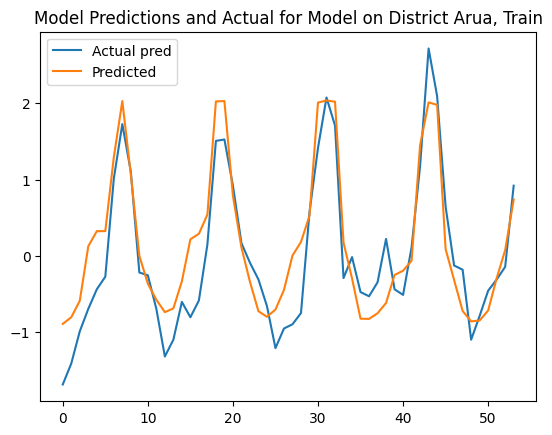

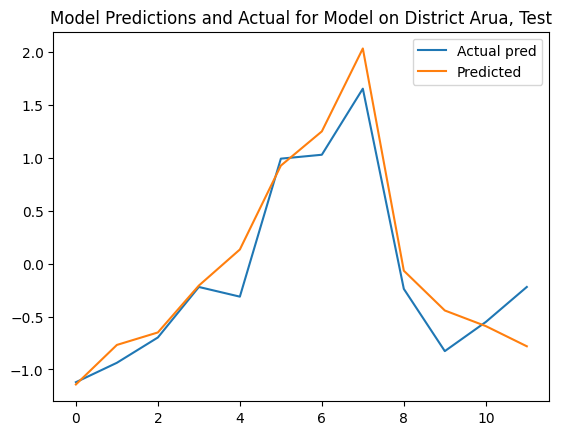

In [20]:
train_and_plot(arua_train_dataloader, arua_test_dataloader, arua_dict, "Arua")

*************Model For District Kasese
Epoch 0: train MSE 11.0513, test MSE 2.6627, train RMSE 3.3243, test RMSE 1.6318
Epoch 10: train MSE 14.9962, test MSE 3.5604, train RMSE 3.8725, test RMSE 1.8869
Epoch 20: train MSE 11.1851, test MSE 2.7537, train RMSE 3.3444, test RMSE 1.6594
Epoch 30: train MSE 9.7302, test MSE 2.8053, train RMSE 3.1193, test RMSE 1.6749
Epoch 40: train MSE 8.2365, test MSE 2.2563, train RMSE 2.8699, test RMSE 1.5021
Epoch 50: train MSE 5.1820, test MSE 0.9556, train RMSE 2.2764, test RMSE 0.9775
Epoch 60: train MSE 3.6370, test MSE 1.4054, train RMSE 1.9071, test RMSE 1.1855
Epoch 70: train MSE 3.0309, test MSE 2.1613, train RMSE 1.7409, test RMSE 1.4701
Epoch 80: train MSE 2.4529, test MSE 2.2717, train RMSE 1.5662, test RMSE 1.5072
Epoch 90: train MSE 1.9724, test MSE 1.6972, train RMSE 1.4044, test RMSE 1.3028


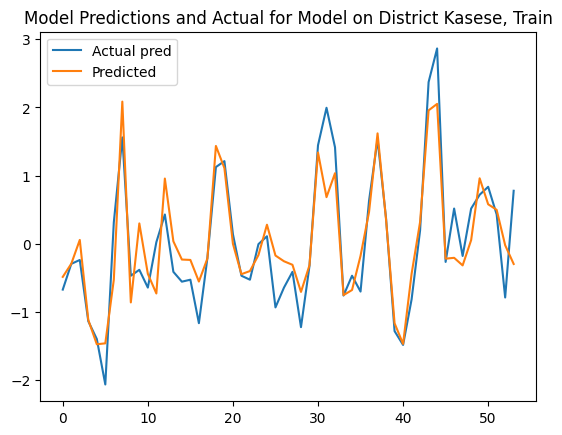

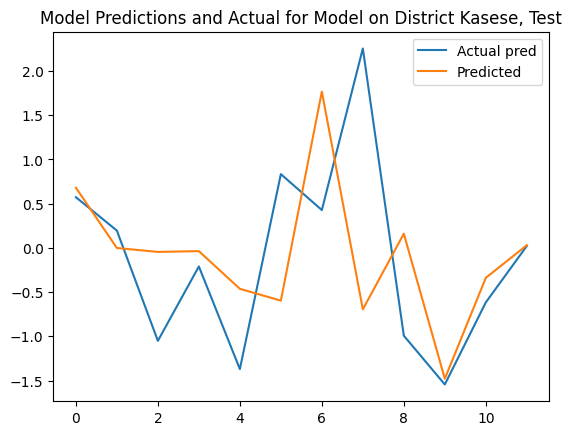

In [21]:
train_and_plot(kasese_train_dataloader, kasese_test_dataloader, kasese_dict, "Kasese")

*************Model For District Kabale
Epoch 0: train MSE 11.1099, test MSE 2.8817, train RMSE 3.3332, test RMSE 1.6976
Epoch 10: train MSE 8.6404, test MSE 2.0188, train RMSE 2.9395, test RMSE 1.4209
Epoch 20: train MSE 2.4173, test MSE 1.1645, train RMSE 1.5548, test RMSE 1.0791
Epoch 30: train MSE 2.8417, test MSE 1.2823, train RMSE 1.6857, test RMSE 1.1324
Epoch 40: train MSE 2.0483, test MSE 0.4633, train RMSE 1.4312, test RMSE 0.6807
Epoch 50: train MSE 2.2923, test MSE 0.8592, train RMSE 1.5140, test RMSE 0.9269
Epoch 60: train MSE 2.1422, test MSE 1.3222, train RMSE 1.4636, test RMSE 1.1499
Epoch 70: train MSE 2.6386, test MSE 0.3059, train RMSE 1.6244, test RMSE 0.5531
Epoch 80: train MSE 2.5913, test MSE 0.6806, train RMSE 1.6097, test RMSE 0.8250
Epoch 90: train MSE 1.3760, test MSE 0.3402, train RMSE 1.1730, test RMSE 0.5833


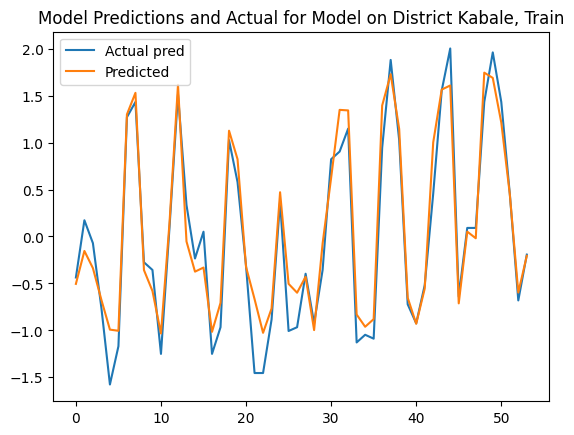

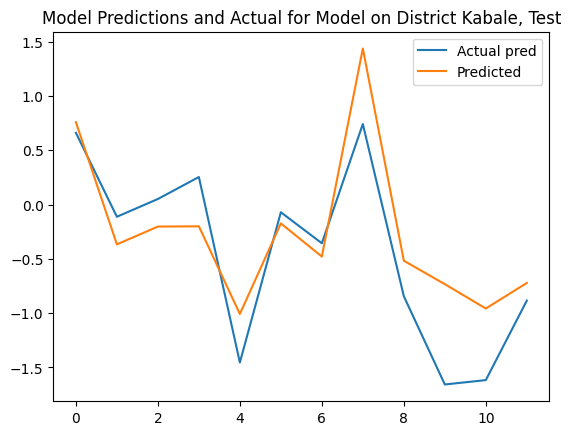

In [22]:
train_and_plot(kabale_train_dataloader, kabale_test_dataloader, kabale_dict, "Kabale")